In [3]:
import matplotlib.pyplot as plt
import os
import pandas as pd

In [4]:
test_files = [
    "./test_data/aneurism_256x256x256_uint8.raw",
    "./test_data/vertebra_512x512x512_uint16.raw",
    "./test_data/magnetic_reconnection_512x512x512_float32.raw"]

num_processes = [2,3,4,5,6,7,8,9,10,11,12,13,14]

In [5]:
serial_results = [
    [16777216, 1.91545, 0.777041, 7.50127],
    [268435456, 22.3804, 11.1656, 1.73566],
    [536870912, 44.1009, 25.4776, 1.15332]
]

In [1]:
compile_mpi_cmd = 'wsl mpic++ huffman_code_mpi.cpp huffman_code_core.cpp -O2 -o mpi_huffman.out'
data_files = ['aneurism_mpi.csv', 'vertebra_mpi.csv', 'magnetic_mpi.csv']
os.system(compile_mpi_cmd) # compile mpi code
for i in range(len(test_files)):
    single_file_results = [["filesize", "encoding", "decoding", "compression_ratio"]]
    filename = test_files[i]
    for p in num_processes:
        run_mpi_cmd = f'wsl mpirun --oversubscribe -np {p} ./mpi_huffman.out {filename} ./test_data/out.raw'
        # print(run_mpi_cmd)
        out = os.popen(run_mpi_cmd).read()
        out_split = [float(d) for d in out.split()]
        print(out_split)
        single_file_results.append(out_split)
    df = pd.DataFrame(single_file_results)
    df.to_csv(data_files[i],header=False)

NameError: name 'os' is not defined

In [28]:
compile_omp_cmd = "wsl g++ -fopenmp huffman_code_openmp.cpp huffman_code_core.cpp -o omp_huffman.out"
data_files = ['aneurism_omp.csv', 'vertebra_omp.csv', 'magnetic_omp.csv']
os.system(compile_omp_cmd) # compile omp code
omp_results = []
for i in range(len(test_files)):
    filename = test_files[i]
    single_file_results = [["filesize", "encoding", "decoding", "compression_ratio"]]
    for p in num_processes:
        os.system('wsl rm ./test_data/*.huff')
        run_omp_cmd = f'wsl  OMP_NUM_THREADS={p} ./omp_huffman.out {filename} out.raw'
        # print(run_mpi_cmd)
        out = os.popen(run_omp_cmd).read()
        out_split = [float(d) for d in out.split()]
        print(out_split)
        single_file_results.append(out_split)
        # delete huff files
    df = pd.DataFrame(single_file_results)
    df.to_csv(data_files[i], header=False)

[16777216.0, 1.73352, 0.817602, 7.4954]
[16777216.0, 1.7898, 0.47961, 7.49533]
[16777216.0, 0.892662, 0.953775, 7.47752]
[16777216.0, 0.893701, 0.247114, 7.47745]
[16777216.0, 0.755202, 0.390983, 7.46855]
[16777216.0, 0.656399, 0.16825, 7.45963]
[16777216.0, 0.566132, 0.994713, 7.44393]
[16777216.0, 0.548915, 0.865362, 7.44386]
[16777216.0, 0.52423, 0.836708, 7.43586]
[16777216.0, 0.498659, 0.085804, 7.42753]
[16777216.0, 0.45734, 0.099305, 7.42046]
[16777216.0, 0.466955, 0.078104, 7.41518]
[16777216.0, 0.468333, 0.079494, 7.4056]
[268435456.0, 34.115, 26.5681, 1.73794]
[268435456.0, 35.3761, 14.1877, 1.73794]


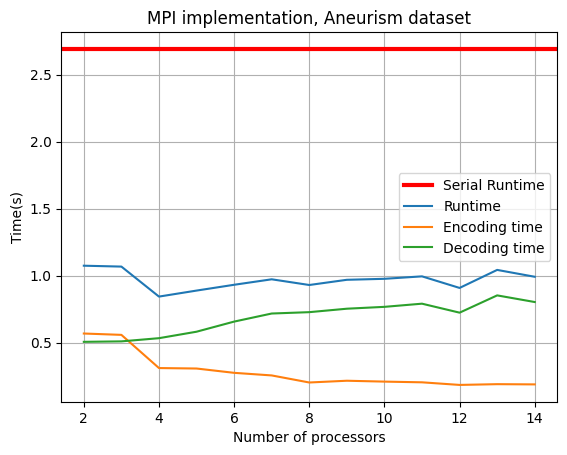

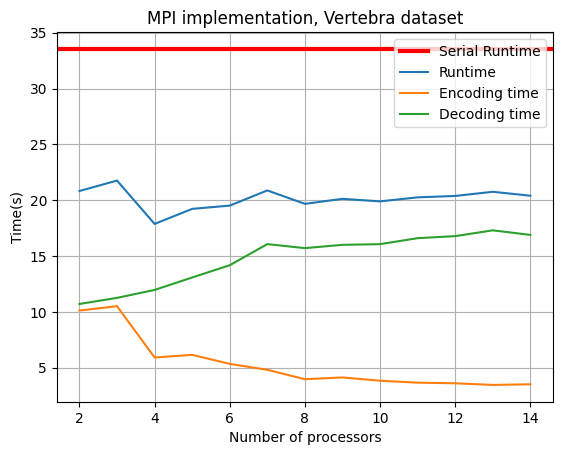

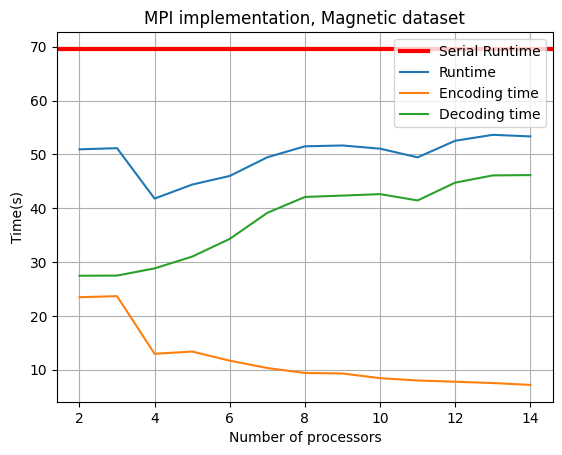

In [24]:
data_files = ['aneurism_mpi.csv', 'vertebra_mpi.csv', 'magnetic_mpi.csv']
data_name = ['Aneurism', 'Vertebra', 'Magnetic']
for i in range(len(data_files)):
    df = pd.read_csv(data_files[i])
    df['runtime'] = df['encoding'] + df['decoding']
    plt.axhline(serial_results[i][1] + serial_results[i][2], linewidth=3, color='red')
    plt.plot(num_processes, df['runtime'])
    plt.plot(num_processes, df['encoding'])
    plt.plot(num_processes, df['decoding'])
    plt.legend(["Serial Runtime", "Runtime", "Encoding time", "Decoding time"])
    plt.grid('on')
    plt.title("MPI implementation, " + data_name[i] + " dataset")
    plt.xlabel("Number of processors")
    plt.ylabel("Time(s)")
    plt.show()

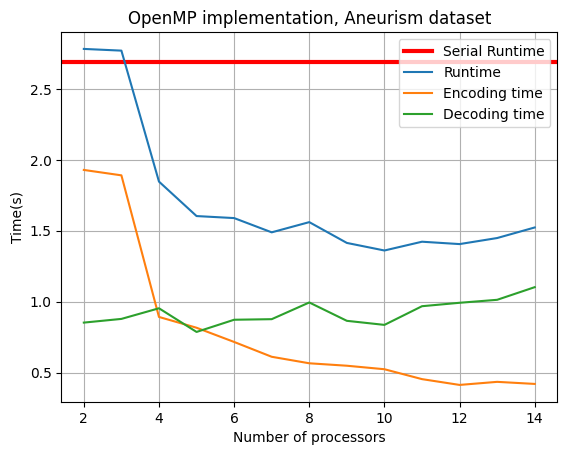

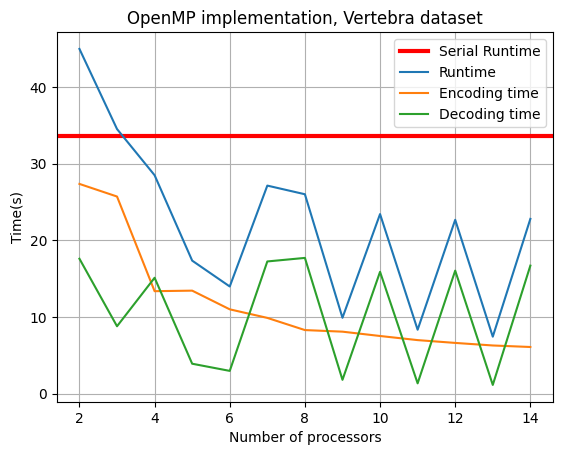

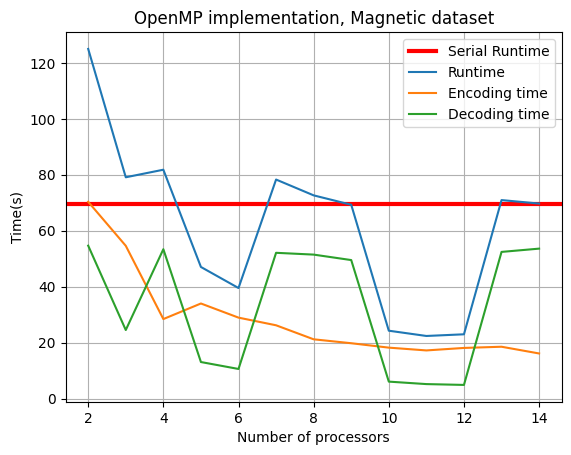

In [17]:
data_files = ['aneurism_omp.csv', 'vertebra_omp.csv', 'magnetic_omp.csv']
data_name = ['Aneurism', 'Vertebra', 'Magnetic']
for i in range(len(data_files)):
    df = pd.read_csv(data_files[i])
    df['runtime'] = df['encoding'] + df['decoding']
    plt.axhline(serial_results[i][1] + serial_results[i][2], linewidth=3, color='red')
    plt.plot(num_processes, df['runtime'])
    plt.plot(num_processes, df['encoding'])
    plt.plot(num_processes, df['decoding'])
    plt.legend(["Serial Runtime", "Runtime", "Encoding time", "Decoding time"])
    plt.grid('on')
    plt.title("OpenMP implementation, " + data_name[i] + " dataset")
    plt.xlabel("Number of processors")
    plt.ylabel("Time(s)")
    plt.show()